![Astrofisica Computacional](logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicio 01. Métodos Numéricos Básicos

## A. Límite de Difracción para un Telescopio

Como es bien conocido, la habilidad para resolver detalles en una observación astronómica esta limitada (entre otros muchos factores) por la difrección de la luz en el telescopio. Para modelar este efecto,
se puede asumir que la luz de una estrella es emitida a partir de un punto localizado en el infinito.
Cuando esta radiación de longitud de onda λ pasa a través de la apertura circular de un telescopio
(con un radio unitario) y se enfoca en el plano focal, no se produce un solo punto luminoso, sino que
se registra un patrón circular de difracción que consiste de una región central luminosa rodeada de
una serie de anillos concéntricos. La intensidad de la luz en el patrón de difracción esta dada por la
función

\begin{equation}
    I(\rho) = \left( \frac{2J_1 (k\rho)}{k\rho} \right)^2,
\end{equation}

donde $\rho$ es la distancia en el plano focal medida desde el centro del patrón, $k = \frac{2\pi}{\lambda}$ y $J_1 (x)$ es una función de Bessel (ver documento adjunto con la deducción completa). 

Las funciones de Bessel de primera especie están definidas por la relación general

\begin{equation}
    J_m (x) = \frac{1}{\pi} \int_0^{\pi} \cos (m\tau - x \sin \tau ) d\tau,
\end{equation}

con $m$ un entero no-negativo y $x\geq 0$.

---

1. Escriba una función que calcule las funciones de Bessel de primera especie $J_m(x)$ utilizando la regla de Simpson con $1000$ puntos en el intervalo de integración.

2. Utilice esta función para graficar el comportamiento de las funciones de Bessel de orden $m=0,1,2$ para $0\leq x \leq 20$.

In [1]:
def integralSimpson(f,a,b,n):
    if (n%2 != 0):
        n+=1
    dx = (b-a)/n

    integral = 0
    integral += f(a)
    integral += f(b)

    for x in range(n-1):
        if x%2 == 0:
            integral += 4*f(dx*(x+1)+a)
        else:
            integral += 2*f(dx*(x+1)+a)

    return integral*(dx/3)


In [2]:
import numpy as np

class f:
    def __init__(self, x, m):
        self.x = x
        self.m = m 

    def f(self,t):
        return np.cos((self.m*t)-(self.x*np.sin(t)))

def J_m(x,m):
    return (1/np.pi)*integralSimpson(f(x,m).f,0,np.pi,1000)


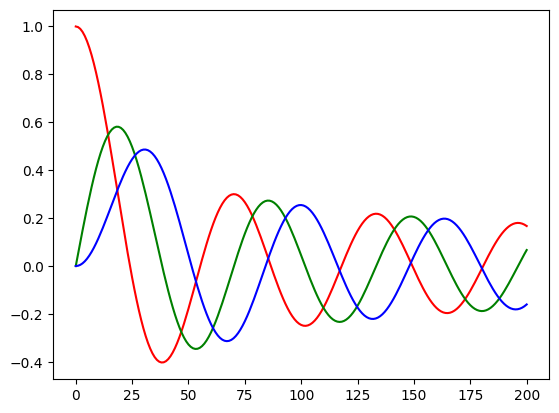

In [3]:
import matplotlib.pyplot as plt
X = [x/10 for x in range(201)]

j_0 =[J_m(x,0) for x in X]
j_1 =[J_m(x,1) for x in X]
j_2 =[J_m(x,2) for x in X]

plt.plot(j_0,c="red")
plt.plot(j_1,c="green")
plt.plot(j_2,c="blue")

plt.show()

<img src="funciones de Bessel.png">

3. Utilice esta función para obtener un gráfico de densidad para la intensidad del patrón de difracción circular para una fuente puntual con $\lambda = 500 \text{ nm}$ en la región $0 \leq \rho \leq 1 \text{ } \mu\text{m}$.

4. Localice los valores de $\rho$ en los cuales se ubican los 4 primeros máximos del patrón de intensidad.

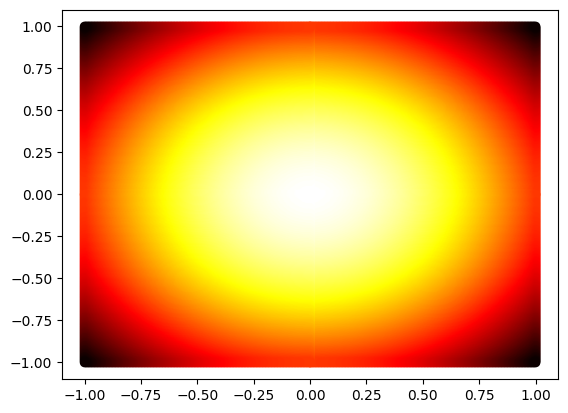

In [4]:
def I(p):
    k=(2*np.pi)/(500*(10**-3))
    return (2*J_m(p,1)/(k*(p+(10**-15))))**2

def generar_puntos(ancho, alto, nx, ny):
    x_coords = np.linspace(0, ancho, nx)
    y_coords = np.linspace(0, alto, ny)

    xx, yy = np.meshgrid(x_coords, y_coords)

    r_coords = np.sqrt(xx**2 + yy**2)
    
    # Crea el dataframe con las coordenadas x, y y el radio
    return xx.flatten(), yy.flatten(), r_coords.flatten()

X,Y,R = generar_puntos(1,1,150,150)

i = np.array([I(p) for p in R])
i_normalizado = (i - np.mean(i)) / np.std(i)

plt.scatter(X[1:],Y[1:],c=i_normalizado[1:],cmap="hot")
plt.scatter(-X[1:],Y[1:],c=i_normalizado[1:],cmap="hot")
plt.scatter(X[1:],-Y[1:],c=i_normalizado[1:],cmap="hot")
plt.scatter(-X[1:],-Y[1:],c=i_normalizado[1:],cmap="hot")
plt.show()

![Airy](Airy.png)

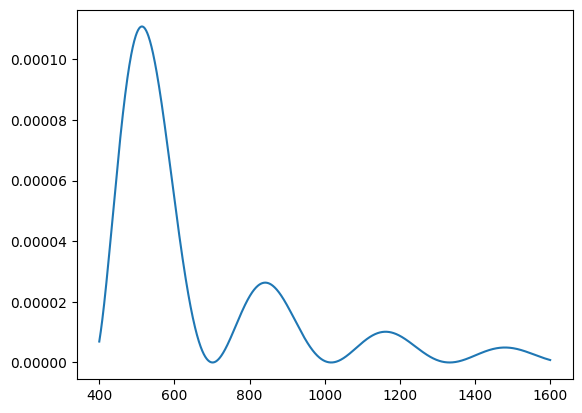

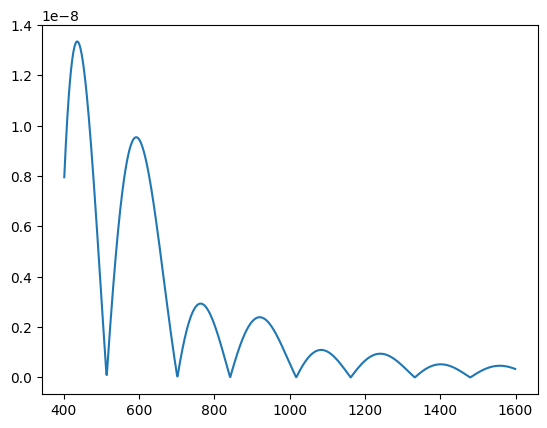

(array([ 382,  512,  513,  699,  700,  701,  702,  838,  839,  840,  841,
        842,  843, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019,
       1020, 1021, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161,
       1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1320, 1321, 1322,
       1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333,
       1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344,
       1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472,
       1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483,
       1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494,
       1495, 1496]),)
[ 3.82  5.12  5.13  6.99  7.    7.01  7.02  8.38  8.39  8.4   8.41  8.42
  8.43 10.11 10.12 10.13 10.14 10.15 10.16 10.17 10.18 10.19 10.2  10.21
 11.53 11.54 11.55 11.56 11.57 11.58 11.59 11.6  11.61 11.62 11.63 11.64
 11.65 11.66 11.67 11.68 11.69 13.2  13.21 13.22 13.23 13.24 13.25 13.26
 13.27 13.28 13.29 13.3  13.

In [5]:
r = range(1601)
i = []
di = []
dr = 1/100
for p in r:
    i.append(I(p*dr))
    if len(i) > 2:
        di.append(abs((i[-3] - i[-1])/2*dr))

plt.plot(r[400:],i[400:])
plt.show()

plt.plot(r[401:-1],di[400:])
plt.show()

ddi = list(di)
ddi.sort()
menor_a = ddi[100]

r = np.array(r) * dr

indices = np.where(di <= menor_a)
print(indices)
indicesMaximos = indices[0][1::2]
print(r[indices[0]])


los maximos se sacaron usando el metodo grafico, pues el delta es muy distinto en los minimos

In [6]:
maxi_r =[5.13,8.41,11.61,14.78]
imaximos = np.array([I(p) for p in maxi_r])
print(imaximos)

[1.10803004e-04 2.63294368e-05 1.01351740e-05 4.93463814e-06]


Teniendo en cuenta los maximos, se grafica de 0 a 15

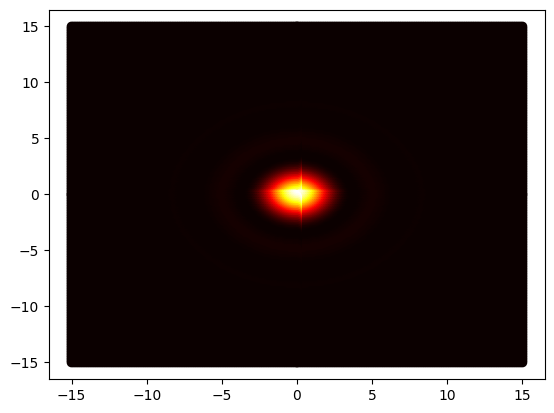

In [7]:
X,Y,R = generar_puntos(15,15,100,100)

i = np.array([I(p) for p in R])
i_normalizado = (i - np.mean(i)) / np.std(i)

plt.scatter(X[1:],Y[1:],c=i_normalizado[1:],cmap="hot")
plt.scatter(-X[1:],Y[1:],c=i_normalizado[1:],cmap="hot")
plt.scatter(X[1:],-Y[1:],c=i_normalizado[1:],cmap="hot")
plt.scatter(-X[1:],-Y[1:],c=i_normalizado[1:],cmap="hot")
plt.savefig("difraccion.svg")
plt.show()